# Script to read MEOP tag data from a given netCDF file

In [1]:
from pathlib import Path
import sys
import os
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import gsw
import meop
import meop_plot_data
import meop_metadata
from importlib import reload

## Load data and metadata

In [190]:
reload(meop)
deployment = 'ct107'
smru_name = 'ct107-933-13'
qf = 'hr1'
namefile = meop.fname_prof(smru_name,deployment,qf)
ds = meop.open_dataset(namefile)
ds

<xarray.Dataset>
Dimensions:                       (N_CALIB: 1, N_LEVELS: 1000, N_PARAM: 4, N_PROF: 202)
Coordinates:
  * N_CALIB                       (N_CALIB) int64 0
  * N_LEVELS                      (N_LEVELS) int64 0 1 2 3 4 ... 996 997 998 999
  * N_PARAM                       (N_PARAM) int64 0 1 2 3
  * N_PROF                        (N_PROF) int64 0 1 2 3 4 ... 198 199 200 201
Data variables:
    DATA_TYPE                     object ...
    FORMAT_VERSION                object ...
    HANDBOOK_VERSION              object ...
    REFERENCE_DATE_TIME           object ...
    DATE_CREATION                 object ...
    DATE_UPDATE                   object ...
    PLATFORM_NUMBER               (N_PROF) object ...
    PROJECT_NAME                  (N_PROF) object ...
    PI_NAME                       (N_PROF) object ...
    STATION_PARAMETERS            (N_PROF, N_PARAM) object ...
    CYCLE_NUMBER                  (N_PROF) float64 ...
    DIRECTION                     (N_PROF) object ...
    DATA_CENTRE                   (N_PROF) object ...
    DC_REFERENCE                  (N_PROF) object ...
    DATA_STATE_INDICATOR          (N_PROF) object ...
    DATA_MODE                     (N_PROF) object ...
    INST_REFERENCE                (N_PROF) object ...
    WMO_INST_TYPE                 (N_PROF) object ...
    JULD                          (N_PROF) object 2014-02-03 08:20:00 ... 201...
    JULD_QC                       (N_PROF) object ...
    JULD_LOCATION                 (N_PROF) object 2014-02-03 08:20:00 ... 201...
    LATITUDE                      (N_PROF) float64 ...
    LONGITUDE                     (N_PROF) float64 ...
    POSITION_QC                   (N_PROF) object ...
    POSITIONING_SYSTEM            (N_PROF) object ...
    PROFILE_PRES_QC               (N_PROF) object ...
    PROFILE_PSAL_QC               (N_PROF) object ...
    PROFILE_TEMP_QC               (N_PROF) object ...
    PRES                          (N_PROF, N_LEVELS) float32 ...
    PRES_QC                       (N_PROF, N_LEVELS) object ...
    PRES_ADJUSTED                 (N_PROF, N_LEVELS) float32 ...
    PRES_ADJUSTED_QC              (N_PROF, N_LEVELS) object ...
    PRES_ADJUSTED_ERROR           (N_PROF, N_LEVELS) float32 ...
    TEMP                          (N_PROF, N_LEVELS) float32 ...
    TEMP_QC                       (N_PROF, N_LEVELS) object ...
    TEMP_ADJUSTED                 (N_PROF, N_LEVELS) float32 ...
    TEMP_ADJUSTED_QC              (N_PROF, N_LEVELS) object ...
    TEMP_ADJUSTED_ERROR           (N_PROF, N_LEVELS) float32 ...
    PSAL                          (N_PROF, N_LEVELS) float32 ...
    PSAL_QC                       (N_PROF, N_LEVELS) object ...
    PSAL_ADJUSTED                 (N_PROF, N_LEVELS) float32 ...
    PSAL_ADJUSTED_QC              (N_PROF, N_LEVELS) object ...
    PSAL_ADJUSTED_ERROR           (N_PROF, N_LEVELS) float32 ...
    PROFILE_CHLA_QC               (N_PROF) object ...
    CHLA                          (N_PROF, N_LEVELS) float32 ...
    CHLA_QC                       (N_PROF, N_LEVELS) object ...
    CHLA_ADJUSTED                 (N_PROF, N_LEVELS) float32 ...
    CHLA_ADJUSTED_QC              (N_PROF, N_LEVELS) object ...
    CHLA_ADJUSTED_ERROR           (N_PROF, N_LEVELS) float32 ...
    PARAMETER                     (N_PROF, N_CALIB, N_PARAM) object ...
    SCIENTIFIC_CALIB_EQUATION     (N_PROF, N_CALIB, N_PARAM) object ...
    SCIENTIFIC_CALIB_COEFFICIENT  (N_PROF, N_CALIB, N_PARAM) object ...
Attributes:
    comment:                   
    number_of_ts_profiles:    202.0
    number_of_t_profiles:     202.0
    number_chla_profiles:     0.0
    number_doxy_profiles:     0.0
    number_light_profiles:    0.0
    geospatial_lat_min:       37.19272206978283
    geospatial_lat_max:       47.72091363130501
    geospatial_lon_min:       207.59866859208003
    geospatial_lon_max:       237.30004208675754
    pi_name:                  COSTA
    data_type:                Marine mammals time-series data


In [167]:
ds.list_metadata()

,DEPLOYMENT_CODE,SMRU_PLATFORM_CODE,CYCLE_NUMBER,JULD,LATITUDE,LONGITUDE,N_TEMP,N_PSAL,N_CHLA
0,ct107,ct107-933-13,1,2014-02-03 08:20:00,37.1720,-122.7780,514.0,514.0,NaN
1,ct107,ct107-933-13,2,2014-02-03 19:10:00,37.2458,-123.4188,502.0,502.0,NaN
2,ct107,ct107-933-13,3,2014-02-04 18:00:00,37.3050,-124.2974,540.0,540.0,NaN
3,ct107,ct107-933-13,4,2014-02-05 03:10:00,37.3046,-124.6129,484.0,484.0,NaN
4,ct107,ct107-933-13,5,2014-02-05 07:10:00,37.3181,-124.8960,300.0,300.0,NaN
...,...,...,...,...,...,...,...,...,...
197,ct107,ct107-933-13,198,2014-04-18 16:19:59,39.0462,-123.7548,58.0,58.0,NaN
198,ct107,ct107-933-13,199,2014-04-19 01:19:59,38.7037,-124.0214,570.0,570.0,NaN
199,ct107,ct107-933-13,200,2014-04-19 07:19:59,38.4822,-123.8449,500.0,500.0,NaN
200,ct107,ct107-933-13,201,2014-04-20 03:00:00,38.0000,-123.3139,110.0,110.0,NaN


## Compute derived variables

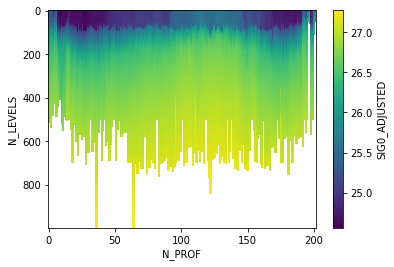

In [201]:
# compute sigma0
ds.add_sigma0().SIG0_ADJUSTED.T.plot(yincrease=False)

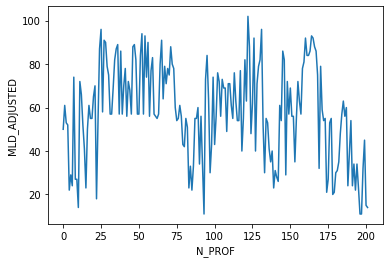

In [202]:
# compute MLD
ds.add_mld().MLD_ADJUSTED.plot()

## plot data summary

(<Figure size 864x648 with 5 Axes>,
 {'T': <matplotlib.axes._subplots.AxesSubplot at 0x7f9f2e51d710>,
  'S': <matplotlib.axes._subplots.AxesSubplot at 0x7f9f2e411f90>,
  'D': <matplotlib.axes._subplots.AxesSubplot at 0x7f9f2e3d4490>,
  'TS': <matplotlib.axes._subplots.AxesSubplot at 0x7f9f2e409a10>,
  'xy': <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7f9f2e3a9810>})

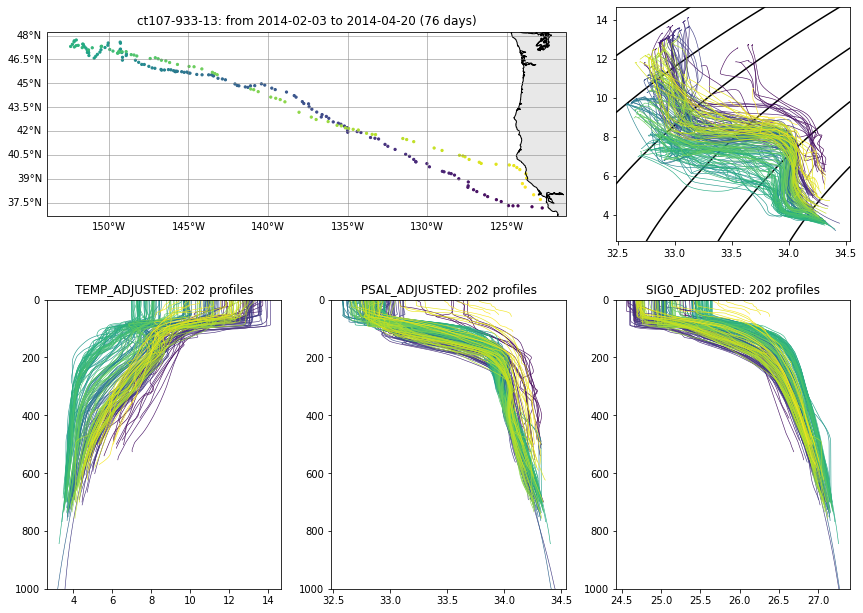

In [183]:
ds.plot_data_tags()

## Plot geographic map

(<Figure size 720x720 with 1 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7f9f2ce072d0>)

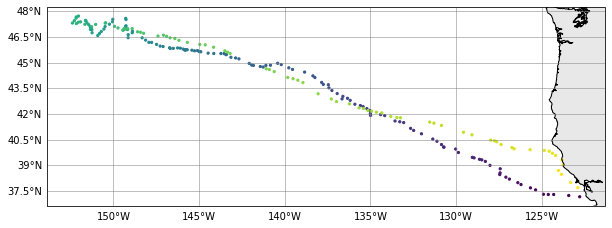

In [203]:
ds.plot_map()

# plot vertical profiles

(<Figure size 720x720 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9f2cd98d10>,
       dtype=object))

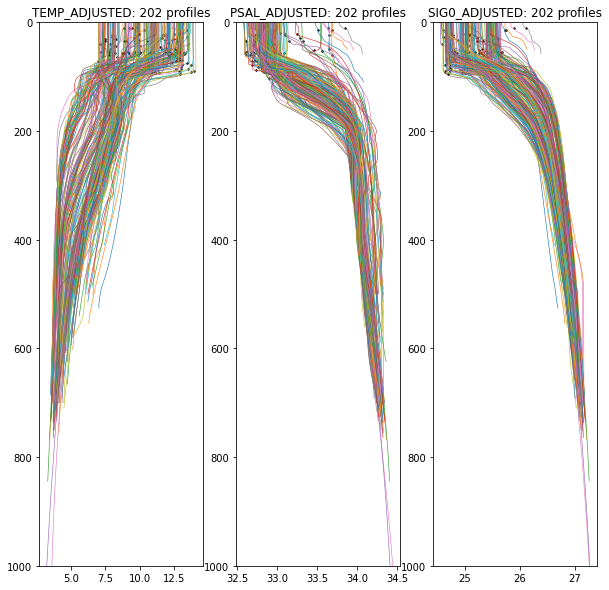

In [204]:
ds.plot_profiles(['TEMP','PSAL','SIG0'])

## plot TS profile

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9f2c4c5b90>)

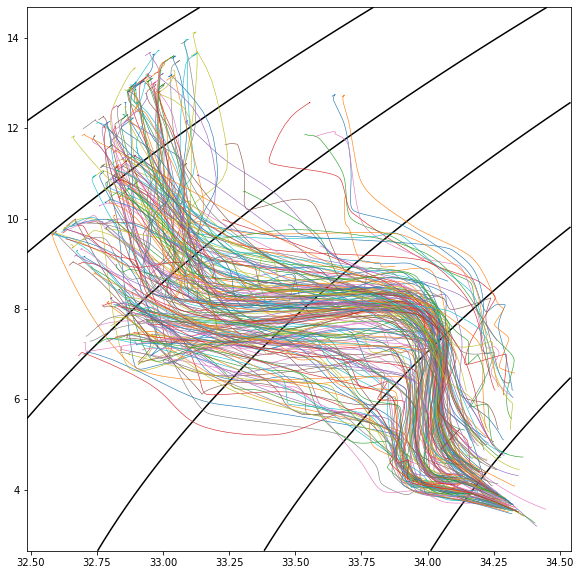

In [205]:
ds.plot_TSdiag()

# plot TS section

(<Figure size 720x720 with 6 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9f2c56ce90>,
       dtype=object))

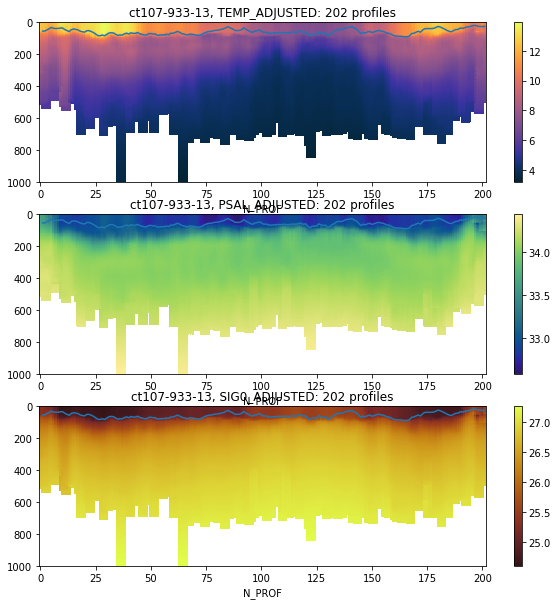

In [206]:
ds.plot_sections(['TEMP','PSAL','SIG0'],rolling=4,density_threshold=0.03)

# select a subset of profiles

(<Figure size 864x648 with 5 Axes>,
 {'T': <matplotlib.axes._subplots.AxesSubplot at 0x7f9f2bf85290>,
  'S': <matplotlib.axes._subplots.AxesSubplot at 0x7f9f2bf47ad0>,
  'D': <matplotlib.axes._subplots.AxesSubplot at 0x7f9f2bf0b050>,
  'TS': <matplotlib.axes._subplots.AxesSubplot at 0x7f9f2bebc5d0>,
  'xy': <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7f9f2bf85950>})

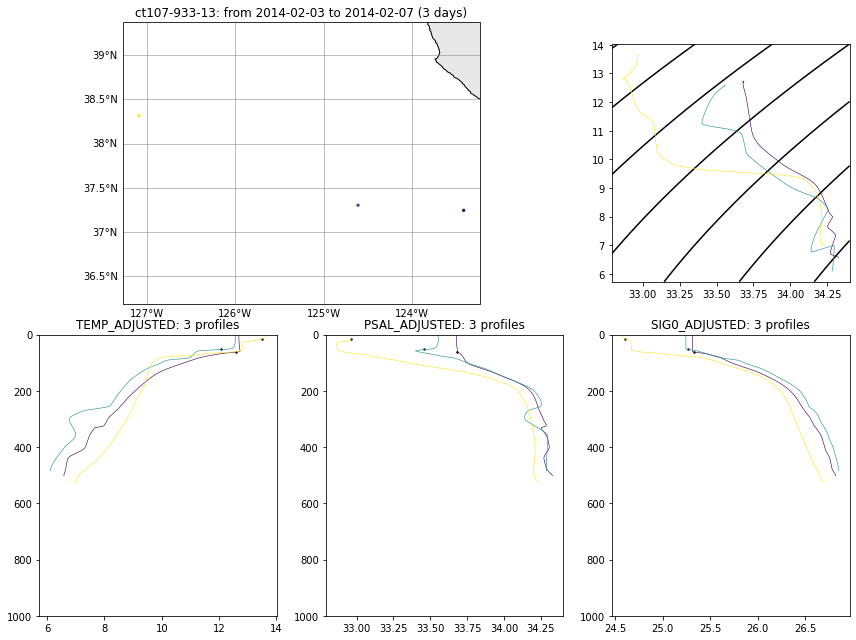

In [207]:
index_subset = [1,3,10]
ds.isel({'N_PROF':index_subset}).plot_data_tags()

(<Figure size 864x648 with 5 Axes>,
 {'T': <matplotlib.axes._subplots.AxesSubplot at 0x7f9f2bd10c10>,
  'S': <matplotlib.axes._subplots.AxesSubplot at 0x7f9f2bcec450>,
  'D': <matplotlib.axes._subplots.AxesSubplot at 0x7f9f2bca1990>,
  'TS': <matplotlib.axes._subplots.AxesSubplot at 0x7f9f2bc53f10>,
  'xy': <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7f9f2bd50d50>})

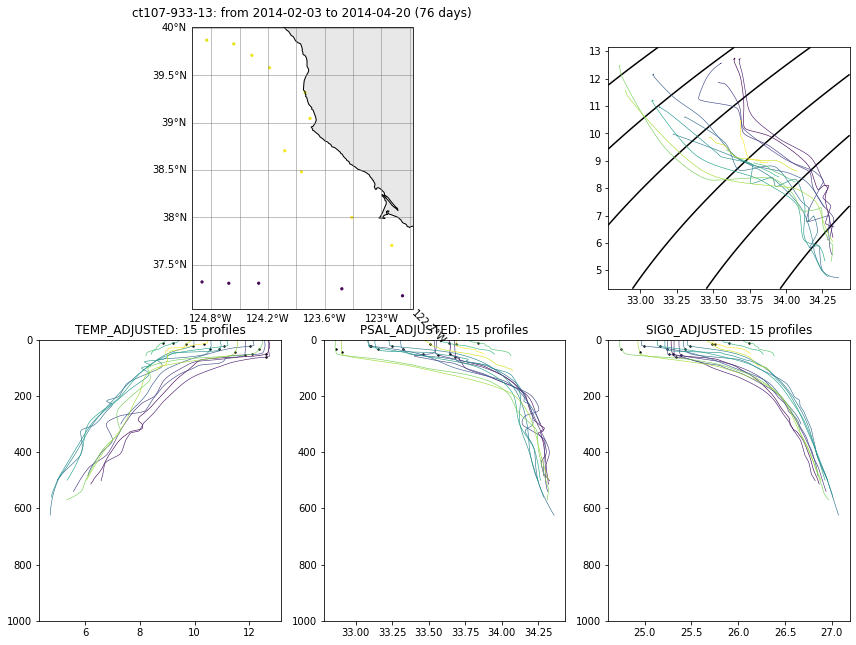

In [208]:
condition = ds.LONGITUDE>-125
ds.isel({'N_PROF':condition}).plot_data_tags()

# Info and Plots about the deployment

In [16]:
deployment = 'ct107'
reload(meop_metadata)
lprofiles, ltags, ldeployments = meop_metadata.list_profiles_from_ncfile(qf='lr0',deployment=deployment)

In [22]:
ltags.head()

,SMRU_PLATFORM_CODE,DEPLOYMENT_CODE,JULD,LATITUDE,LONGITUDE,MASK,N_PROF_TEMP,N_PROF_PSAL,N_PROF_CHLA,PUBLIC,...,S2,remove,Sremove,comments,variable_offset,instr_id,year,period,continuous,prefix
0,ct107-933-13,ct107,2014-02-03 08:20:00.000002,37.192722,-122.699958,North Pacific,202,202,0,1,...,-0.03,0,0,no comment,NaN,12933,2014,reproduction,0.0,2014001
1,ct107-933b-13,ct107,2014-09-03 23:29:59.999997,43.223513,-149.805575,North Pacific,0,0,0,1,...,0.00,1,0,no comment,NaN,NaN,NaN,NaN,NaN,NaN
2,ct107-934-13-N1,ct107,2014-02-01 23:29:59.999997,37.416895,-123.083985,North Pacific,186,186,0,1,...,0.06,0,0,no comment,NaN,12934,2014,reproduction,0.0,2014003
3,ct107-934-13-N2,ct107,2014-06-16 05:49:59.999996,37.147900,-122.388900,North Pacific,54,54,0,1,...,0.06,0,0,no comment,NaN,NaN,NaN,NaN,NaN,NaN
4,ct107-938-13-N1,ct107,2014-02-03 23:40:00.000001,37.115500,-122.442100,North Pacific,204,204,0,1,...,-0.02,0,0,no comment,NaN,NaN,NaN,NaN,NaN,NaN


(<Figure size 720x720 with 1 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7f7593124450>)

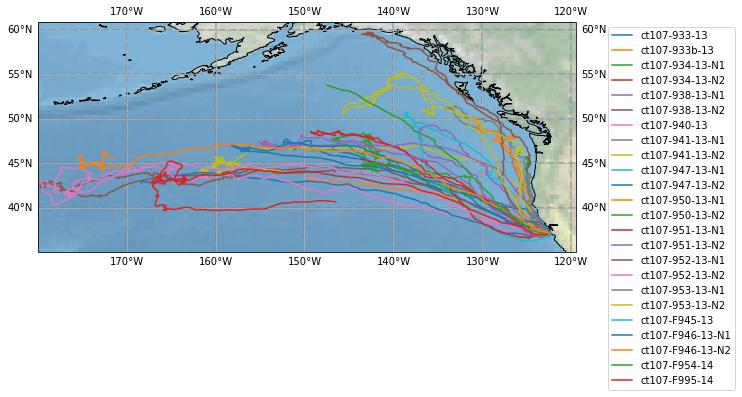

In [16]:
meop_plot_data.plot_map_deployments(lprofiles)

(<Figure size 864x648 with 5 Axes>,
 {'T': <matplotlib.axes._subplots.AxesSubplot at 0x7f7593d7d490>,
  'S': <matplotlib.axes._subplots.AxesSubplot at 0x7f7593d941d0>,
  'D': <matplotlib.axes._subplots.AxesSubplot at 0x7f7593d33590>,
  'TS': <matplotlib.axes._subplots.AxesSubplot at 0x7f7593d4bb10>,
  'xy': <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7f7593d88a50>})

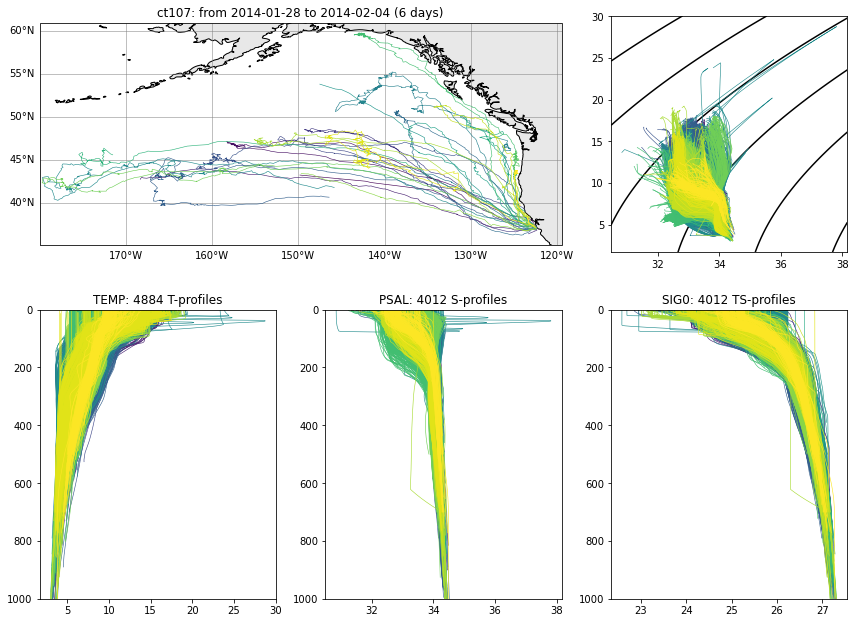

In [9]:
meop_plot_data.plot_data_deployments(deployment)